In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm

## Fig. S5. Probability distributions for different numbers of DNA molecules encapsulated within the same liposome at varying DNA concentrations. 

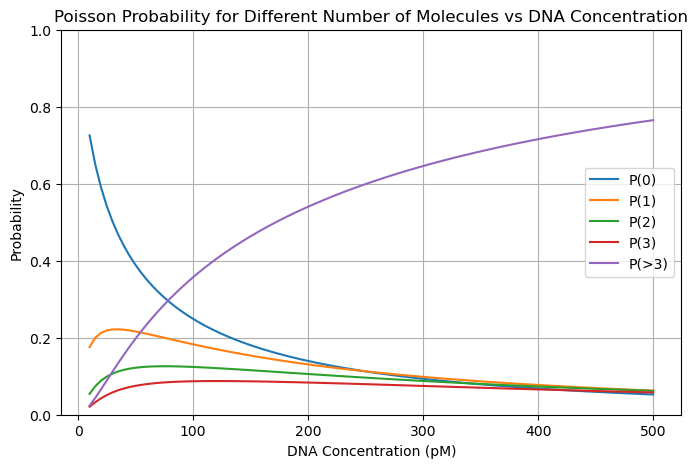

In [28]:
# Constants
NA = 6.022e23  # Avogadro's number (molecules/mol)
conversion_factor = 1000  # 1 m^3 = 1000 L

# Define range of DNA concentrations (pM) and convert to M
C_values_pM = np.linspace(10, 500, 100)  # 100 points from 10 pM to 500 pM
C_values_M = C_values_pM * 1e-12  # Convert pM to M

# Mean and standard deviation in the original scale for d
mean_d = 4.5e-6  # Example mean of d in the original scale
std_d = 2.3e-6   # Example standard deviation of d in the original scale

# Log-normal distribution parameters for d
mu = np.log((mean_d**2) / np.sqrt(std_d**2 + mean_d**2))  # Mean in log space
sigma = np.sqrt(np.log(1 + (std_d**2 / mean_d**2)))  # Std in log space

# Generate d values as log-normal distribution
d_values = np.random.lognormal(mu, sigma, 1000)  # 1000 log-normal samples for d

# Compute lambda for each d and concentration
lambda_values_all_d = []

for d in d_values:
    lambda_values = (math.pi * NA * C_values_M * d**3 * conversion_factor) / 6
    lambda_values_all_d.append(lambda_values)

lambda_values_all_d = np.array(lambda_values_all_d)

# Poisson distribution P(k) calculation
def poisson(k, lam):
    return (lam**k * np.exp(-lam)) / math.factorial(k)

# Plot the probability for <1, 1, 2, 3, 4, 5, >5 molecules
fig, ax = plt.subplots(figsize=(8, 5))

# Calculate the probabilities for different conditions (<1, 1, 2, 3, 4, 5, >5)
probabilities_less_than_1 = []
probabilities_1 = []
probabilities_2 = []
probabilities_3 = []
probabilities_4 = []
probabilities_5 = []
probabilities_more_than_5 = []
probabilities_more_than_3 = []

for lam in lambda_values_all_d:
    prob_less_than_1 = poisson(0, lam)  # P(k=0)
    prob_1 = poisson(1, lam)  # P(k=1)
    prob_2 = poisson(2, lam)  # P(k=2)
    prob_3 = poisson(3, lam)  # P(k=3)
    prob_4 = poisson(4, lam)  # P(k=4)
    prob_5 = poisson(5, lam)  # P(k=5)
    prob_more_than_5 = 1 - (prob_less_than_1 + prob_1 + prob_2 + prob_3 + prob_4 + prob_5)  # P(k>5)
    prob_more_than_3 = 1 - (prob_less_than_1 + prob_1 + prob_2 + prob_3)  # P(k>3)

    
    probabilities_less_than_1.append(prob_less_than_1)
    probabilities_1.append(prob_1)
    probabilities_2.append(prob_2)
    probabilities_3.append(prob_3)
    probabilities_4.append(prob_4)
    probabilities_5.append(prob_5)
    probabilities_more_than_5.append(prob_more_than_5)
    probabilities_more_than_3.append(prob_more_than_3)

# Convert lists to numpy arrays for plotting
probabilities_less_than_1 = np.array(probabilities_less_than_1)
probabilities_1 = np.array(probabilities_1)
probabilities_2 = np.array(probabilities_2)
probabilities_3 = np.array(probabilities_3)
probabilities_4 = np.array(probabilities_4)
probabilities_5 = np.array(probabilities_5)
probabilities_more_than_5 = np.array(probabilities_more_than_5)
probabilities_more_than_3 = np.array(probabilities_more_than_3)


# Plot the results
ax.plot(C_values_pM, probabilities_less_than_1.mean(axis=0), label="P(0)")
ax.plot(C_values_pM, probabilities_1.mean(axis=0), label="P(1)")
ax.plot(C_values_pM, probabilities_2.mean(axis=0), label="P(2)")
ax.plot(C_values_pM, probabilities_3.mean(axis=0), label="P(3)")
#ax.plot(C_values_pM, probabilities_4.mean(axis=0), label="P(4)")
#ax.plot(C_values_pM, probabilities_5.mean(axis=0), label="P(5)")
ax.plot(C_values_pM, probabilities_more_than_3.mean(axis=0), label="P(>3)")

# Set plot labels and title
ax.set_ylim(0, 1)
ax.set_xlabel("DNA Concentration (pM)")
ax.set_ylabel("Probability")
ax.set_title("Poisson Probability for Different Number of Molecules vs DNA Concentration")
ax.legend()

ax.grid(True)

# Show the plot
plt.show()


## Fig. S6. Probability of co-encapsulation of two DNA species in the same liposome. 

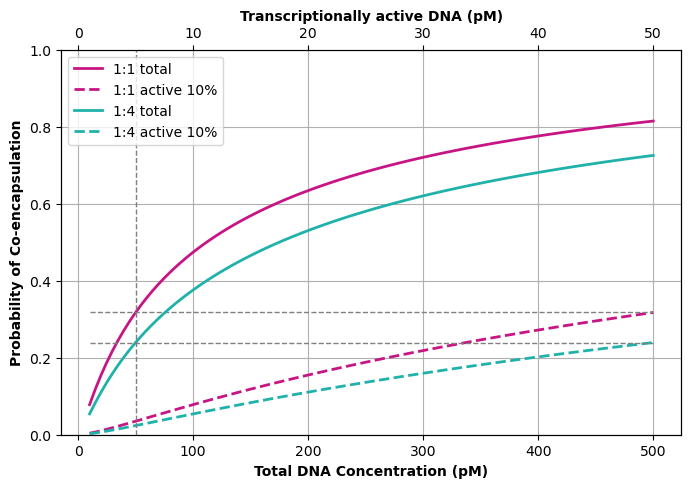

In [31]:
# Constants
NA = 6.022e23            # molecules/mol
conversion_factor = 1000  # 1 m^3 = 1000 L

# Total DNA concentrations (pM) and convert to M
C_total_pM = np.linspace(10, 500, 100)
C_total_M = C_total_pM * 1e-12

# Liposome size distribution parameters
mean_d = 4.5e-6  # meters
std_d = 2.3e-6   # meters
mu = np.log((mean_d**2) / np.sqrt(std_d**2 + mean_d**2))
sigma = np.sqrt(np.log(1 + (std_d**2 / mean_d**2)))
d_values = np.random.lognormal(mu, sigma, 1000)  # 1000 liposomes

# Define species ratios (fraction of total DNA) and their colors
ratios = {
    "1:1": {"frac": (0.5, 0.5), "color": "mediumvioletred"},
    "1:4": {"frac": (0.2, 0.8), "color": "lightseagreen"},
}

# Fraction of active DNA
active_fraction = 0.1

# Poisson probability of at least one molecule
def poisson_prob_at_least_one(lam):
    return 1 - np.exp(-lam)

# Plotting
fig, ax = plt.subplots(figsize=(8,5))

for label, info in ratios.items():
    frac_A, frac_B = info["frac"]
    color = info["color"]
    
    prob_both_total_all_d = []
    prob_both_active_all_d = []
    
    for d in d_values:
        # Lambda for total DNA
        lambda_A = (math.pi * NA * (C_total_M * frac_A) * d**3 * conversion_factor) / 6
        lambda_B = (math.pi * NA * (C_total_M * frac_B) * d**3 * conversion_factor) / 6
        
        # Lambda for active DNA
        lambda_A_active = lambda_A * active_fraction
        lambda_B_active = lambda_B * active_fraction
        
        # Probabilities
        P_A = poisson_prob_at_least_one(lambda_A)
        P_B = poisson_prob_at_least_one(lambda_B)
        prob_both_total_all_d.append(P_A * P_B)
        
        P_A_act = poisson_prob_at_least_one(lambda_A_active)
        P_B_act = poisson_prob_at_least_one(lambda_B_active)
        prob_both_active_all_d.append(P_A_act * P_B_act)
    
    # Convert to arrays
    prob_both_total_all_d = np.array(prob_both_total_all_d)
    prob_both_active_all_d = np.array(prob_both_active_all_d)
    
    # Plot total DNA probability (solid)
    ax.plot(C_total_pM, prob_both_total_all_d.mean(axis=0), label=f"{label} total", color=color, linewidth=2)
    
    # Plot active DNA probability (dashed)
    ax.plot(C_total_pM, prob_both_active_all_d.mean(axis=0), linestyle='--', label=f"{label} active 10%", color=color, linewidth=2)
    
    # Horizontal line at last point of active DNA (same style as vertical dashed line)
    final_prob = prob_both_active_all_d.mean(axis=0)[-1]
    ax.hlines(final_prob, xmin=C_total_pM[0], xmax=C_total_pM[-1],
              colors='grey', linestyles='--', linewidth=1)

# Vertical dashed line at 50 pM total DNA
ax.vlines(50, 0, 1, colors='grey', linestyle='--', linewidth=1)

# Secondary X-axis for absolute active DNA concentration
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # align top axis with bottom axis
ticks_bottom = np.linspace(0, 500, 6)  # choose 6 tick positions for clarity
ax_top.set_xticks(ticks_bottom)
ax_top.set_xticklabels([f"{int(x*active_fraction)}" for x in ticks_bottom])
ax_top.set_xlabel("Transcriptionally active DNA (pM)", fontweight='bold')

# Plot settings
ax.set_ylim(0, 1)
ax.set_xlabel("Total DNA Concentration (pM)", fontweight='bold')
ax.set_ylabel("Probability of Co-encapsulation", fontweight='bold')
ax.grid(True)
ax.legend(loc='upper left')
#fig.savefig("coencapsulation_probability.png", dpi=300, bbox_inches="tight")
plt.show()


## Calculator: Probability of co-encapsulation of two DNA species in the same liposome. 

Using the code below the user can choose the desired the DNA concentration of two species A and B (C_A_pM and C_B_pM, respectively) and calculate the probability of co-encapsulation.

In [30]:
# DNA concentrations in pM
C_A_pM = 100 # TO BE DEFINED BY THE USER
C_B_pM = 400 # TO BE DEFINED BY THE USER

# pM to M
C_A_M = C_A_pM * 1e-12
C_B_M = C_B_pM * 1e-12

# Compartment diameter distribution
mean_d = 4.5e-6
std_d = 2.3e-6

# Log-normal parameters
mu = np.log((mean_d**2) / np.sqrt(std_d**2 + mean_d**2))
sigma = np.sqrt(np.log(1 + (std_d**2 / mean_d**2)))

# Generate d values
d_values = np.random.lognormal(mu, sigma, 1000)

# Compute lambda for each species
lambda_A = (np.pi * NA * C_A_M * d_values**3 * conversion_factor) / 6
lambda_B = (np.pi * NA * C_B_M * d_values**3 * conversion_factor) / 6

print(f"Species A (100 pM) - Mean λ: {lambda_A.mean():.3f}, Std λ: {lambda_A.std():.3f}")
print(f"Species B (400 pM) - Mean λ: {lambda_B.mean():.3f}, Std λ: {lambda_B.std():.3f}")

# Probability of each species being present in a compartment (Poisson: P(k>=1))
prob_A = 1 - np.exp(-lambda_A)
prob_B = 1 - np.exp(-lambda_B)

# Probability that both species are co-encapsulated
prob_both = prob_A * prob_B
print(f"Mean probability that both species are in the same compartment: {prob_both.mean():.3f}")



Species A (100 pM) - Mean λ: 5.243, Std λ: 10.495
Species B (400 pM) - Mean λ: 20.971, Std λ: 41.980
Mean probability that both species are in the same compartment: 0.716
